## Integration

               Time  Proximity  Engine Speed  Pressure
2023-01-08 18:15:49      27.64           568    1741.0
No anomaly was detected ✅
Digital Twin was successfully updated.
Proximity: 27.64mm (updated: 2023-01-08T17:15:53.3717640Z)
Engine speed: 568RPM (updated: 2023-01-08T17:15:53.8112257Z)
Pressure: 1741bar (updated: 2023-01-08T17:15:54.0060955Z)


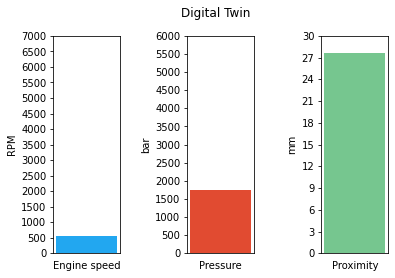

In [2]:
# Integration of entire pipeline
def integration(send_to_twin = False):
    # Load libraries
    import data_simulation as ds
    import machine_learning as ml
    import azure_digital_twin as adt
    
    # Iterate through real-time data simulation
    for i in ds.simulate_real_time(0.1, 0.1, 0.1, 0.5):
        # Print data
        print(i[["Time", "Proximity", "Engine Speed", "Pressure"]].to_string(index = False))

         # Send data to Digital Twin
        if send_to_twin == True:
            # Check data for anomalies ("correct" refers to correct data)
            if ml.detect_anomalies(i[["Proximity", "Engine Speed", "Pressure"]]) == "correct":
                # Update digital twin
                adt.set_proximity(float(i["Proximity"]))
                adt.set_engine_speed(int(i["Engine Speed"]))
                adt.set_pressure(int(i["Pressure"]))

                # Print success message
                print("Digital Twin was successfully updated.")
                
                # Check updated values
                adt.print_proximity()
                adt.print_engine_speed()
                adt.print_pressure()

                # Visualize state of the digital twin
                adt.plot_sensor_values()
            else:
                # Print failure message
                print("Digital Twin was not updated.")
                clear_output(wait=True)

integration(send_to_twin = True)